# Exploring the distribution of pvalues from regression

In [1]:
import pandas as pd
import numpy as np 
import pylab
import scipy.stats as stats
import math
from scripts import qvalue
import matplotlib.pylab as plt

In [ ]:
chr_1 = pd.read_table('/storage/dana/spliceSTR/regression_final/chr1_regression.csv')
chr_2 = pd.read_table('/storage/dana/spliceSTR/regression_final/chr2_regression.csv')

In [ ]:
chr_2.shape[0]/ 4000

In [ ]:
chr_1['qvalues'] = qvalue.estimate(chr_1['p.wald'])
chr_1

In [ ]:
chr_1.sort_values(by='qvalues',ascending=True,inplace=True)
chr_1_crop = chr_1[chr_1['p.wald'] > 0]

In [ ]:
chr_1_crop['p.wald']

In [ ]:
chr_1_control = pd.read_table('/storage/dana/spliceSTR/regression_final/permuted/chr1_regression.csv')
chr_2_control = pd.read_table('/storage/dana/spliceSTR/regression_final/permuted/chr2_regression.csv')

## These are simple histograms of p-values by chromosome. 
> Under the null hypothesis  p-values should be uniformly distributed.

> Expecting to see my null control (linear regression with --permute option) to be uniform, and my actual p-values to have a spike around 0.  

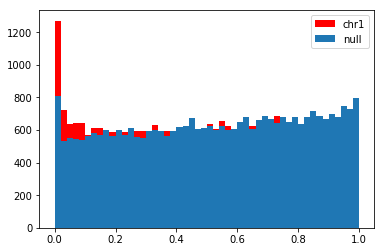

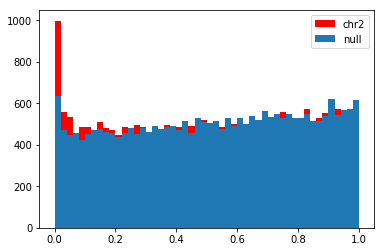

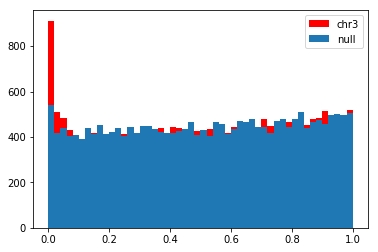

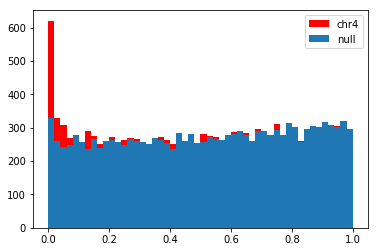

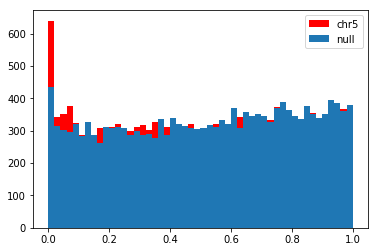

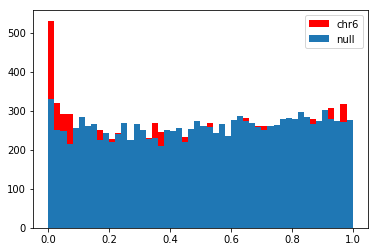

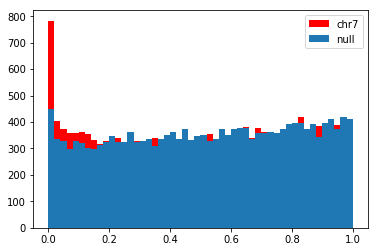

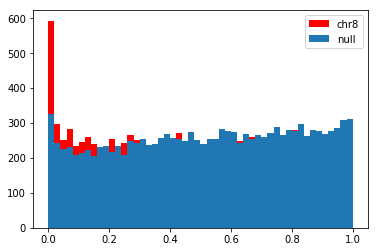

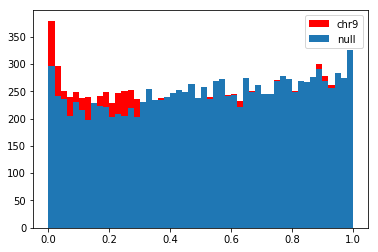

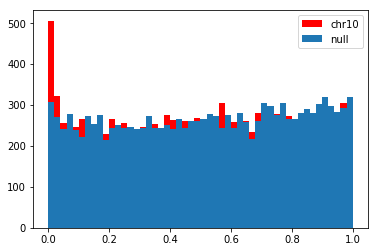

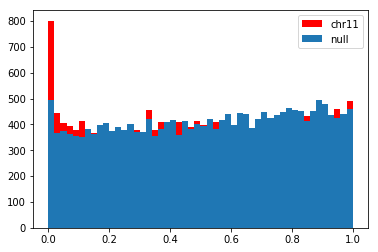

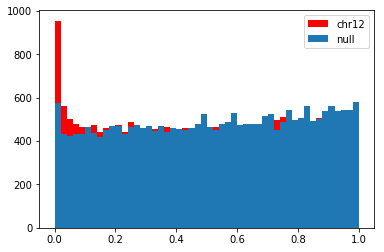

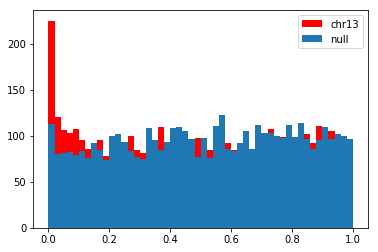

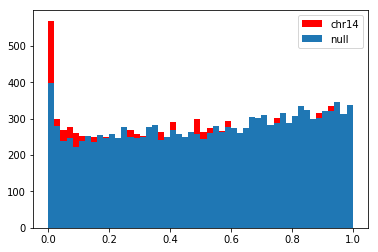

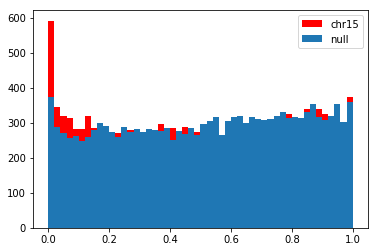

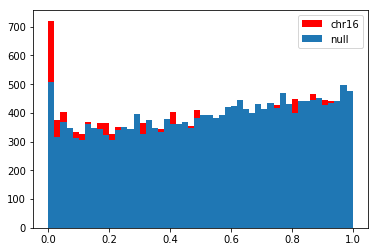

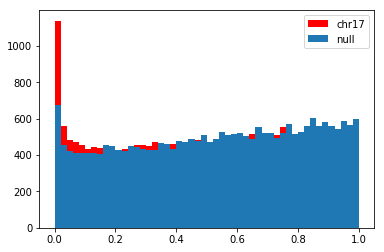

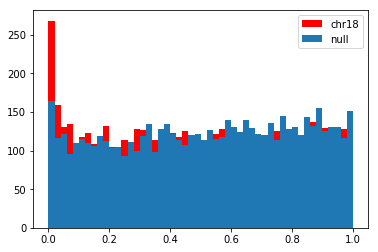

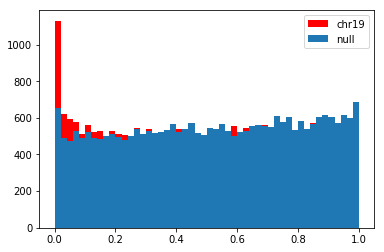

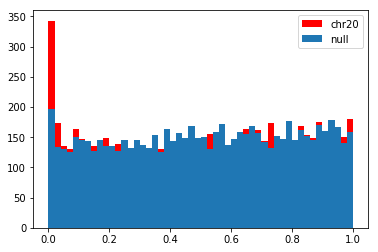

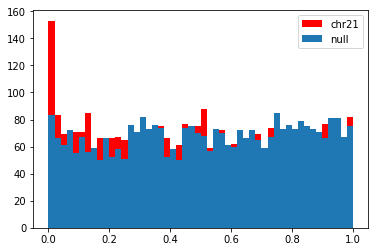

KeyboardInterrupt: 

In [2]:
total = 
for c in range(1,24):
    if c == 23:
        c = 'X'
    chr_df = pd.read_table('/storage/dana/spliceSTR/regression_final/chr{}_regression.csv'.format(c))
    chr_ctrl_df = pd.read_table('/storage/dana/spliceSTR/regression_final/permuted/chr{}_regression.csv'.format(c))
    
    chr_df_crop = chr_df[chr_df['p.wald'] > 0]
    chr_ctrl_df_crop = chr_ctrl_df[chr_ctrl_df['p.wald'] > 0]
    
    plt.hist(chr_df_crop['p.wald'].dropna(),bins=50,color='r',label='chr' + str(c))
    plt.hist(chr_ctrl_df_crop['p.wald'].dropna(),bins=50,label ='null')
    plt.legend()
    plt.show()

## QQ plots by chromosome 
> Code taken from the gymreklab eSTRs git repo for figure 1.

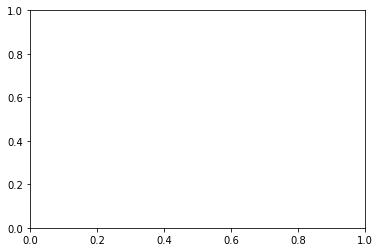

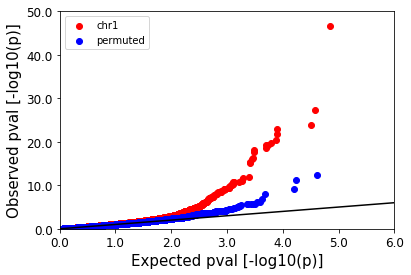

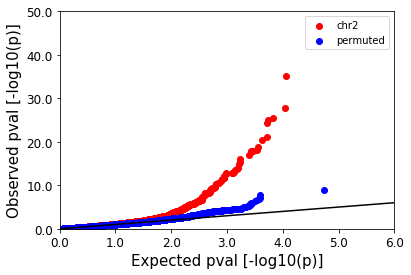

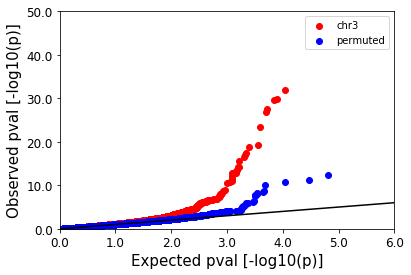

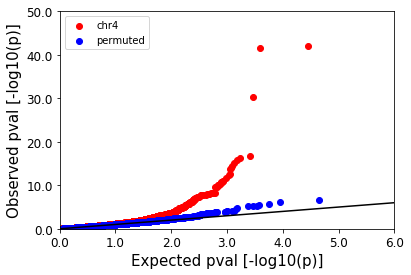

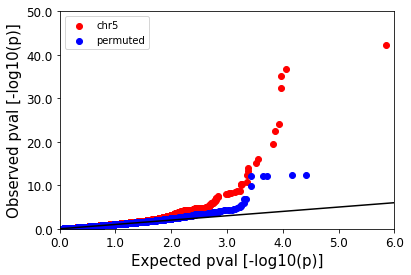

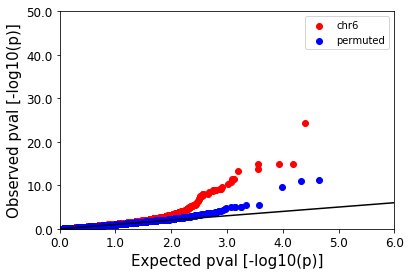

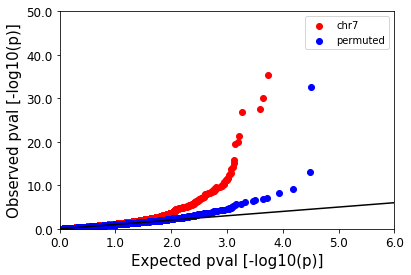

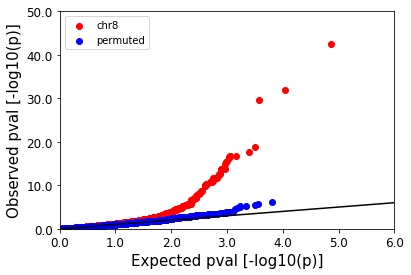

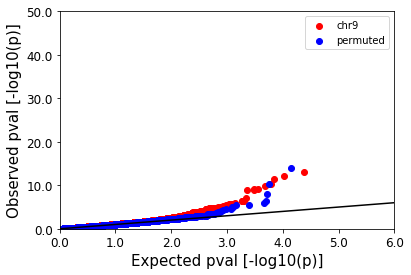

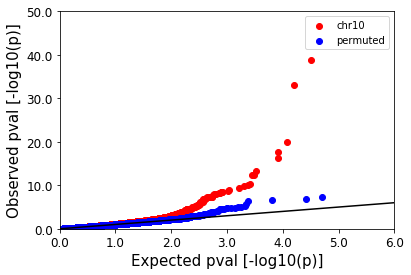

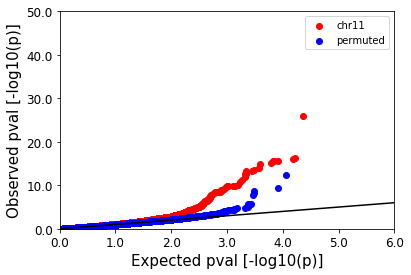

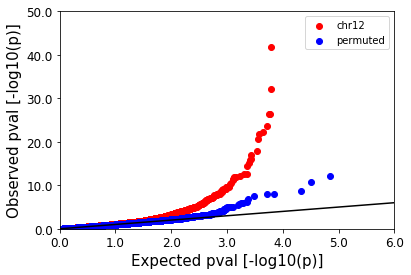

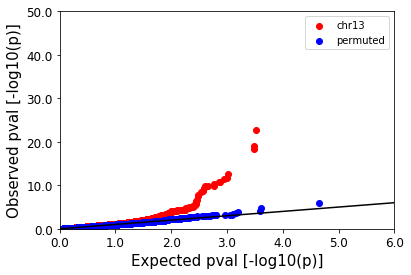

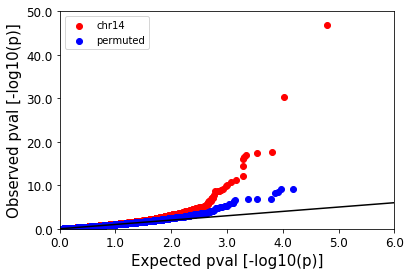

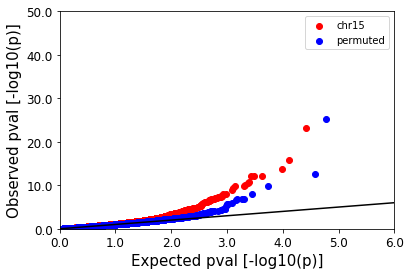

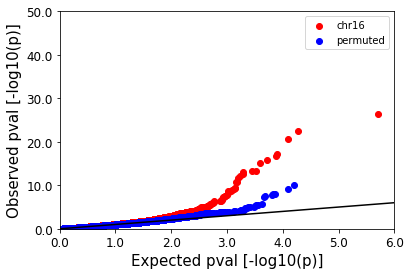

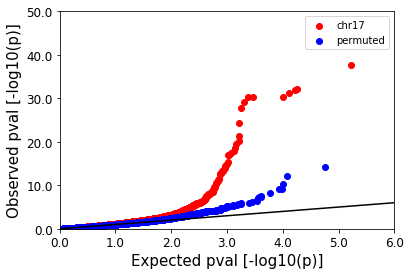

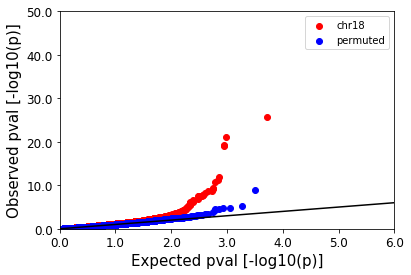

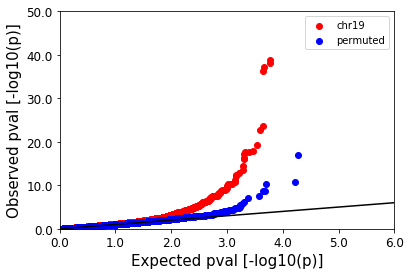

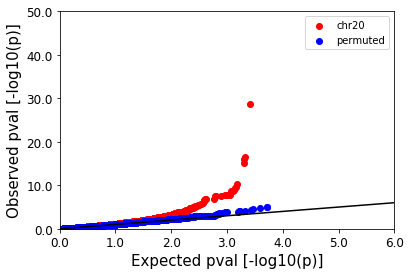

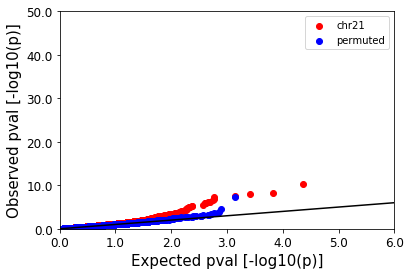

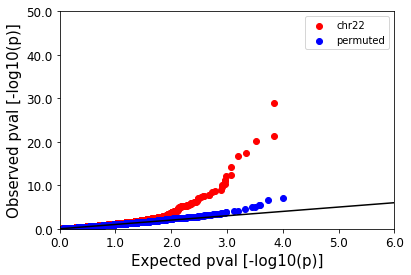

354117
354156
354117
354156


ValueError: x and y must be the same size

In [3]:
import matplotlib.pyplot as plt

total_p_val_log = []
total_p_val_ctrl_log = []
total_unif_log = []
total_unif_ctrl_log = []

for c in range(1,24):
    
    if c != 23:
        
        chr_df = pd.read_table('/storage/dana/spliceSTR/regression_final/chr{}_regression.csv'.format(c))
        chr_ctrl_df = pd.read_table('/storage/dana/spliceSTR/regression_final/permuted/chr{}_regression.csv'.format(c))

        chr_df_crop = chr_df[chr_df['p.wald'] > 0]
        chr_ctrl_df_crop = chr_ctrl_df[chr_ctrl_df['p.wald'] > 0]
    
        unif = sorted(list(np.random.uniform(low=0, high=1, size=len(chr_df_crop['p.wald']))))
        unif_ctrl = sorted(list(np.random.uniform(low=0, high=1, size=len(chr_ctrl_df_crop['p.wald']))))
        #unif = sorted(list(np.random.normal(loc=0.5, size=len(chr_1_crop['p.wald']))))
        unif_log = [-1*np.log10(x) for x in unif]
        unif_ctrl_log = [-1*np.log10(x) for x in unif_ctrl]
        p_values_ctrl = sorted(chr_ctrl_df_crop['p.wald'])
        p_values = sorted(chr_df_crop['p.wald'])
        p_values_log = [-1*np.log10(x) for x in p_values]
        p_values_ctrl_log = [-1*np.log10(x) for x in p_values_ctrl]
        max_p_value = max(p_values_log)

        total_p_val_log.extend(list(p_values_log))
        total_p_val_ctrl_log.extend(list(p_values_ctrl_log))
        total_unif_log.extend(list(unif_log))
        total_unif_ctrl_log.extend(list(unif_ctrl_log))
    else:
        p_values_logs = sorted(total_p_val_log,reverse=True) 
        print(len(p_values_logs))
        p_values_ctrl_log = sorted(total_p_val_ctrl_log,reverse=True)
        print(len(p_values_ctrl_log))
        unif_log = sorted(total_unif_log,reverse=True)
        print(len(unif_log))
        unif_ctrl_log = sorted(total_unif_ctrl_log,reverse=True)
        print(len(unif_ctrl_log))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(unif_log,p_values_log,c='r',label='chr' +str(c))
    ax.scatter(unif_ctrl_log,p_values_ctrl_log,c='b',label='permuted')
    ax.plot([0,6],[0,6], color="black")
    ax.set_xlim(left=0, right=6)
    ax.set_ylim(bottom=0, top=50)
    ax.set_xlabel("Expected pval [-log10(p)]", size=15)
    ax.set_ylabel("Observed pval [-log10(p)]", size=15)
    ax.set_xticklabels(ax.get_xticks(), size=12)
    ax.set_yticklabels(ax.get_yticks(), size=12)
    ax.legend()
    plt.show()


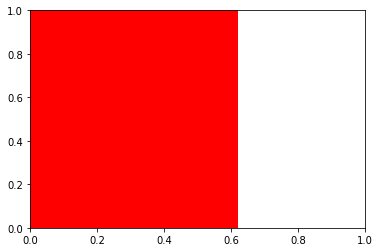

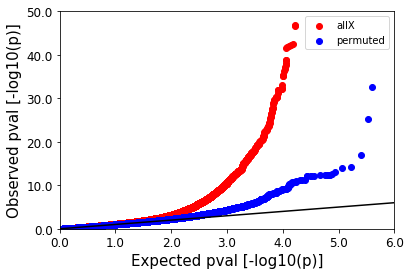

In [4]:
import matplotlib.pyplot as plt

p_values = []
p_values_ctrl = []

for c in range(1,24):
    
    if c == 23:
        c = 'X'
        
        
    chr_df = pd.read_table('/storage/dana/spliceSTR/regression_final/chr{}_regression.csv'.format(c))
    chr_ctrl_df = pd.read_table('/storage/dana/spliceSTR/regression_final/permuted/chr{}_regression.csv'.format(c))

    p_values.extend(chr_df['p.wald'])
    p_values_ctrl.extend(chr_ctrl_df['p.wald'])
    
unif = sorted(list(np.random.uniform(low=0, high=1, size=len(p_values))))
unif_ctrl = sorted(list(np.random.uniform(low=0, high=1, size=len(p_values_ctrl))))

unif_log = [-1*np.log10(x) for x in unif]
unif_ctrl_log = [-1*np.log10(x) for x in unif_ctrl]

p_values_ctrl = sorted(p_values_ctrl)
p_values = sorted(p_values)
p_values_log = [-1*np.log10(x) for x in p_values]
p_values_ctrl_log = [-1*np.log10(x) for x in p_values_ctrl]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(unif_log,p_values_log,c='r',label='all' +str(c))
ax.scatter(unif_ctrl_log,p_values_ctrl_log,c='b',label='permuted')
ax.plot([0,6],[0,6], color="black")
ax.set_xlim(left=0, right=6)
ax.set_ylim(bottom=0, top=50)
ax.set_xlabel("Expected pval [-log10(p)]", size=15)
ax.set_ylabel("Observed pval [-log10(p)]", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.legend()
plt.show()